# Introduction

### The Scope of the Project
- This project is the assignment of "Machine Learning for Classification" module at BBS Data Science Program.
- The general goal of this assignment is to show a practical application of the methods shown during the module. To accomplish this goal, performance of a multi-class SVM with that of a multi-class neural network is compared. 

### Selected Problem
- To unveil the performance of SVMs and ANNs, an image classification problem is framed.
- Kaggle website contains numerous datasets and challenges that are appropriate for any image classification problem.
- From the said website "Dogs and Cats" challenge was examined and chosen.

### Framework
- CRISP-DM framework is used throughout this project's comparison process.

### Tools

- For this assignment, in addition to Phyton 3.6 and its libraries sklearn, numpy, matplotlib, skimage, imagenet_utils, pickle a library specialized in deep learning called Keras+Tensorflow are used.
- Compatibility issues were dealt with code alterations and consistency checks.

# Section 1 - Business Understanding

- The goal of "Dogs vs Cats" challenge is to create an alghoritm to distinguish dogs from cats. In this assignment also, same goal is shared to evaluate the performance of a multi-class SVM with that of a multi-class neural network.

# Section 2 - Data Understanding

- To do a comparison between methods, the image archive of "Dogs vs Cats" challenge on Kaggle network has been downloaded. (https://www.kaggle.com/c/dogs-vs-cats/data)
-  This challenge's website contains an archive of 25,000 images of dogs and cats to train the model.
- Due to computational constraints, initially a total of 2,000 images of dogs and cats was selected and saved into "dogs" and "cats" folders. In a further step, the total number of images further was cut-down and the total number reduced to 1,000. 

# Section 3 - Data Preparation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

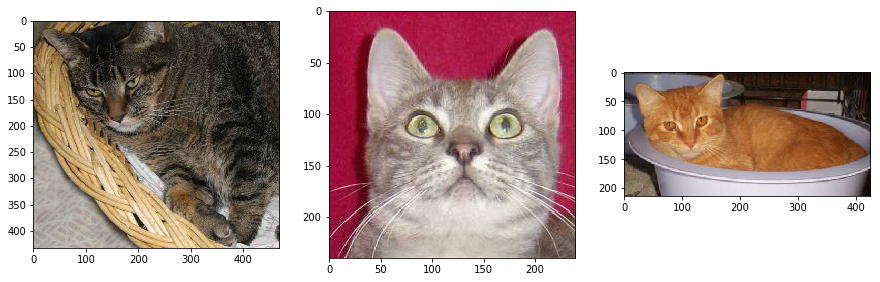

In [2]:
fig, ax = plt.subplots(1,3, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_cats)
img = plt.imread(os.path.join(root_dir, cats_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_cats)
img = plt.imread(os.path.join(root_dir, cats_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_cats)
img = plt.imread(os.path.join(root_dir, cats_dir, rand_img))
ax[2].imshow(img)

plt.show()

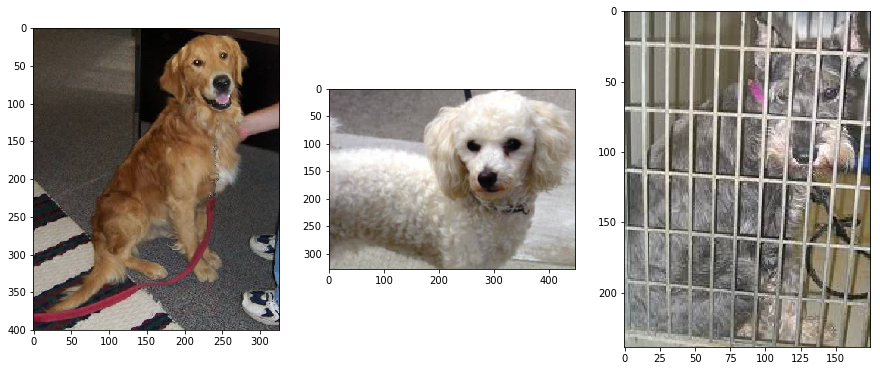

In [3]:
fig, ax = plt.subplots(1,3, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_dogs)
img = plt.imread(os.path.join(root_dir, dogs_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_dogs)
img = plt.imread(os.path.join(root_dir, dogs_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_dogs)
img = plt.imread(os.path.join(root_dir, dogs_dir, rand_img))
ax[2].imshow(img)

plt.show()

# Section 4 - Modeling

### SVM with 1,000 images

To see the importance of using good features to build a traditional classifier, we will start training an SVM for pasta recognition. We will first use the pixels as attributes and then we will try to extract more useful features.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

Prior to training of the model, images from each of the two classes have been resized to match a certain size at the stage below by utilizing skimage.transform.resize.

In [4]:
import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

At this point, the classes will be split into train and test set and the class vectors will be converted to binary class matrix. Out of 1,000 images, 800 will be used to train the model and 200 will be used to test it.

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

Using TensorFlow backend.


In [ ]:
from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='linear', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

In the next lines, SVM will be used with kernel having parameter 'rbf' and C '1' to train our model and the accuracy of train set and test set will be printed.

In [ ]:
from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='rbf', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

In the next lines, SVM will be used with kernel having parameter 'poly' and C '1' to train our model and the accuracy of train set and test set will be printed.

In [ ]:
from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='poly', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

In the next lines, SVM will be used with kernel having parameter 'sigmoid' and C '1' to train our model and the accuracy of train set and test set will be printed.

In [ ]:
from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='sigmoid', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

In the next lines, SVM will be used with kernel having parameter 'rbf' and C '2' to train our model and the accuracy of train set and test set will be printed.

Acc Train: 0.505000, Acc Test:0.480000
Acc Train: 0.505000, Acc Test:0.480000
Acc Train: 0.505000, Acc Test:0.480000
Acc Train: 0.505000, Acc Test:0.480000
Acc Train: 0.505000, Acc Test:0.480000
Acc Train: 0.538750, Acc Test:0.480000
Acc Train: 0.803750, Acc Test:0.600000
Acc Train: 0.931250, Acc Test:0.640000
Acc Train: 1.000000, Acc Test:0.635000
Acc Train: 1.000000, Acc Test:0.635000
Acc Train: 1.000000, Acc Test:0.625000
Acc Train: 1.000000, Acc Test:0.625000
Acc Train: 1.000000, Acc Test:0.625000


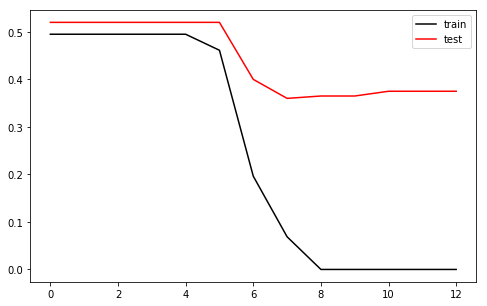

In [6]:
from sklearn import svm

C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='rbf', C=C_val)
    clf.fit(X_train, Y_train)
    score_train = clf.score(X_train, Y_train)
    score_test = clf.score(X_test,Y_test)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

In [ ]:
from sklearn import svm

C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val)
    clf.fit(X_train, Y_train)
    score_train = clf.score(X_train, Y_train)
    score_test = clf.score(X_test,Y_test)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

### SVM with 4,000 images

As in our first attempt with 1,000 images, our test accuracy is relatively low, we will this time re-attempt with 4,000 images.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'cats_dogs/'
cats_dir = 'cats2/'
dogs_dir = 'dogs2/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)
    
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='linear', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

### SVM with PNG images

We will this time re-attempt with 4,000 images.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'cats_dogs/'
cats_dir = 'cats_png/'
dogs_dir = 'dogs_png/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)
    
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='linear', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

Now, we will use more powerful descriptors, namely _Histograms of Oriented Gradients_ (HOG) and _Color Histograms_. 

Next code will be removed....

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features

features = extract_features(X,[hog_features, color_histogram_hsv])
print(X.shape)
print(features.shape)

scaler = StandardScaler()
X = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
clf.score(X_test,Y_test)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

### Neural Network Using Keras Library 

At this stage, we will create a neural network using the Keras library. Specify a shape for the input layer, a shape for the output layer and stack layers in between! 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)
    
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

model = Sequential()
model.add(Dense(100,input_shape=(12675,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In the neural network world, each iteration of this algorithm is called _a epoch_. Each epoch works by predicting the values for a subset of examples, computing the loss for these cases, computing the gradient of each weight with respect to the loss and moving the weights in the direction of the negative of the gradient. The number of examples used for a round of prediction and correction is called _the batch size_. An epoch finishes when all the training examples have been used for perfoming corrections. ---THIS TEXT WILL BE REMOVED---


At this stage, our neural networks will be trained.

In [ ]:
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 64
n_epochs = 20

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))

with open('FNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import pickle

with open('FNN_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Creating and Training a Convolutional Neural Net

_convolutional neural nets_ (CNNs).

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(target_w, target_h, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 10

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))

with open('CNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

with open('CNN_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Using Pre-trained Nets

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
#from scipy.misc import imresize as resize

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

import matplotlib.image as img
from skimage.transform import resize

target_w = 299
target_h = 299
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = np.array(all_imgs, dtype=np.float32)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]

print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from vgg16 import VGG16
from keras.preprocessing import image
from imagenet_utils import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

X = preprocess_input(X)
print(X.shape)

features = model.predict(X)

print(features.shape)
print(type(features))

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(9,9,512)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 20

features_train, features_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=42)

history = model.fit(features_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2, validation_data=(features_test, Y_test))

with open('VGG16_based_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


In [ ]:
with open('VGG16_based_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import pickle

with open('VGG16_based_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import pickle


root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

import matplotlib.image as img

target_w = 299
target_h = 299
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

X = np.array(all_imgs, dtype=np.float32)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#from vgg16 import VGG16
#from keras.preprocessing import image
#from imagenet_utils import preprocess_input

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

X = preprocess_input(X)
print(X.shape)

features = model.predict(X)

print(features.shape)
print(type(features))

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(9,9,512)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 10

features_train, features_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=42)

history = model.fit(features_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2, validation_data=(features_test, Y_test))


with open('VGG16_based_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Using TensorFlow backend.


(1000, 299, 299, 3)
(1000,)
(1000, 299, 299, 3)
(1000, 9, 9, 512)
<class 'numpy.ndarray'>
Train on 800 samples, validate on 200 samples
Epoch 1/10
 - 4s - loss: 0.7372 - acc: 0.4987 - val_loss: 0.6949 - val_acc: 0.4800
Epoch 2/10
 - 3s - loss: 0.6933 - acc: 0.5050 - val_loss: 0.6932 - val_acc: 0.4800
Epoch 3/10
 - 3s - loss: 0.6931 - acc: 0.5050 - val_loss: 0.6932 - val_acc: 0.4800
Epoch 4/10
 - 3s - loss: 0.6932 - acc: 0.5050 - val_loss: 0.6932 - val_acc: 0.4800
Epoch 5/10
 - 3s - loss: 0.6932 - acc: 0.5050 - val_loss: 0.6933 - val_acc: 0.4800
Epoch 6/10
 - 3s - loss: 0.6931 - acc: 0.5050 - val_loss: 0.6933 - val_acc: 0.4800
Epoch 7/10
 - 3s - loss: 0.6931 - acc: 0.5050 - val_loss: 0.6933 - val_acc: 0.4800
Epoch 8/10
 - 3s - loss: 0.6931 - acc: 0.5050 - val_loss: 0.6933 - val_acc: 0.4800
Epoch 9/10
 - 3s - loss: 0.6931 - acc: 0.5050 - val_loss: 0.6934 - val_acc: 0.4800
Epoch 10/10
 - 3s - loss: 0.6931 - acc: 0.5050 - val_loss: 0.6934 - val_acc: 0.4800


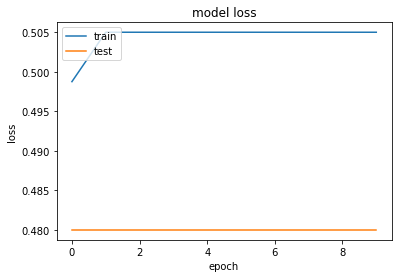

In [2]:
import pickle

with open('VGG16_based_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Section 5 - Evaluation

# Section 6 - Deployment